In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn import metrics

In [52]:
df = pd.read_csv('diabetes-dataset.csv')
df = df.rename(columns={'Outcome': 'DiabetesOutcome'})

In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesOutcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


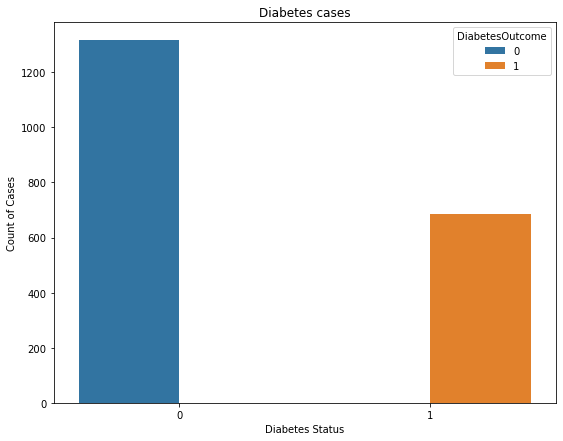

In [54]:
plt.figure(figsize=(9,7))
sns.countplot(x='DiabetesOutcome', hue='DiabetesOutcome', data=df).set(title='Diabetes cases', ylabel='Count of Cases', xlabel='Diabetes Status')
plt.show()

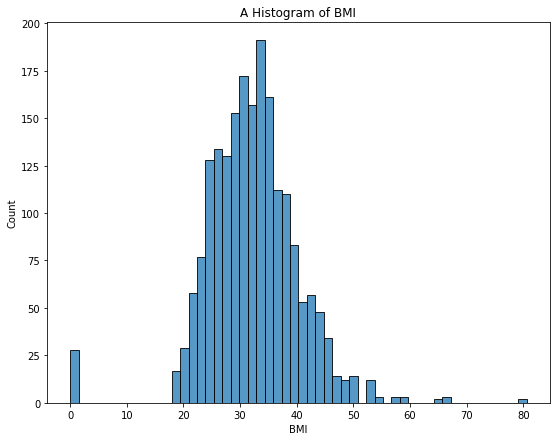

In [55]:
plt.figure(figsize=(9,7))
sns.histplot(x='BMI', data=df).set(title='A Histogram of BMI', ylabel='Count', xlabel='BMI')
plt.show()

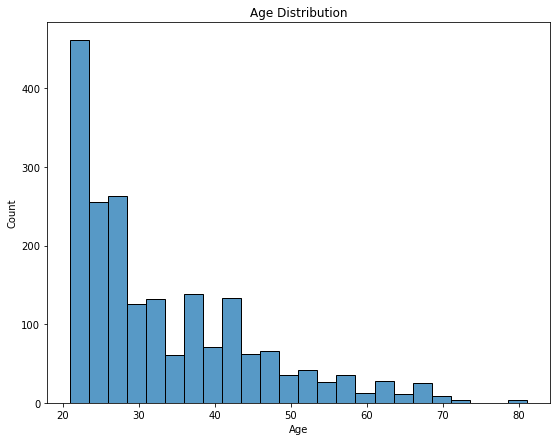

In [56]:
plt.figure(figsize=(9,7))
sns.histplot(x='Age', data=df).set(title='Age Distribution', ylabel='Count', xlabel='Age')
plt.show()

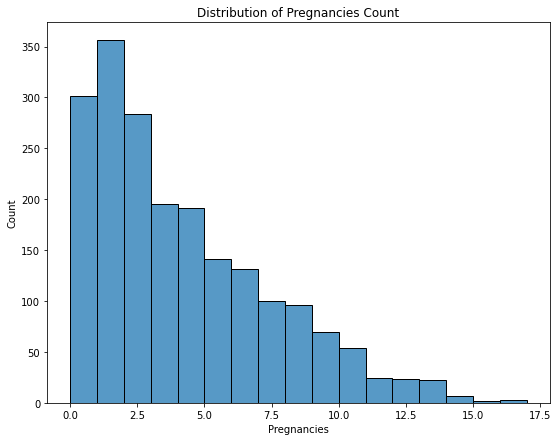

In [57]:
plt.figure(figsize=(9,7))
sns.histplot(x='Pregnancies', binwidth=1, data=df).set(title='Distribution of Pregnancies Count', ylabel='Count', xlabel='Pregnancies')
plt.show()

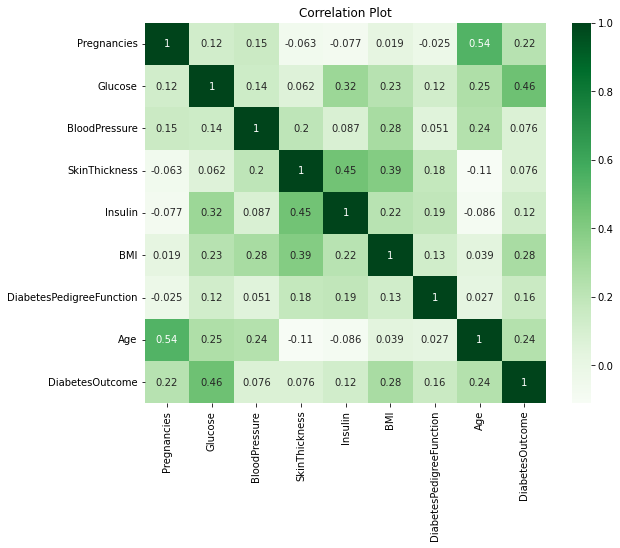

In [58]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Greens", annot=True).set(title='Correlation Plot')
plt.show()

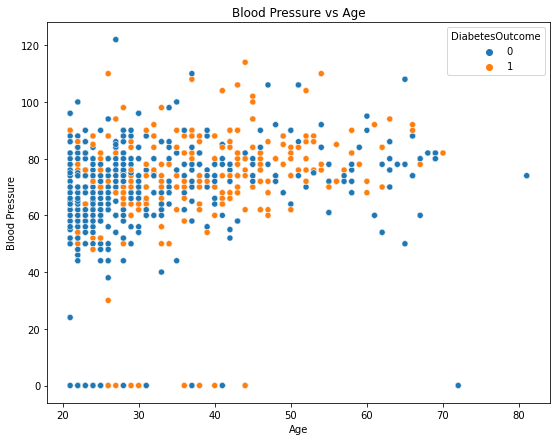

In [59]:
plt.figure(figsize=(9,7))
sns.scatterplot(df, y='BloodPressure', x='Age', hue='DiabetesOutcome').set(title='Blood Pressure vs Age', ylabel='Blood Pressure', xlabel='Age')
plt.show()

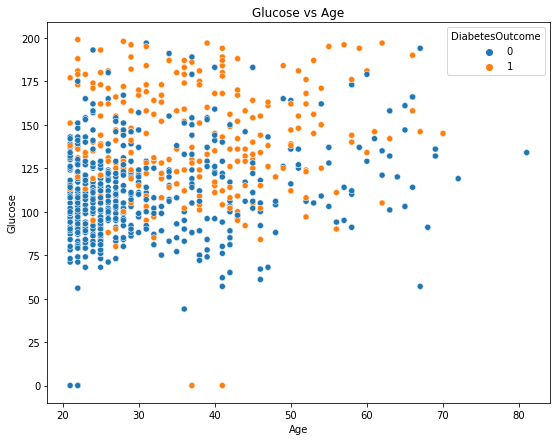

In [60]:
plt.figure(figsize=(9,7))
sns.scatterplot(df, y='Glucose', x='Age', hue='DiabetesOutcome').set(title='Glucose vs Age', ylabel='Glucose', xlabel='Age')
plt.show()

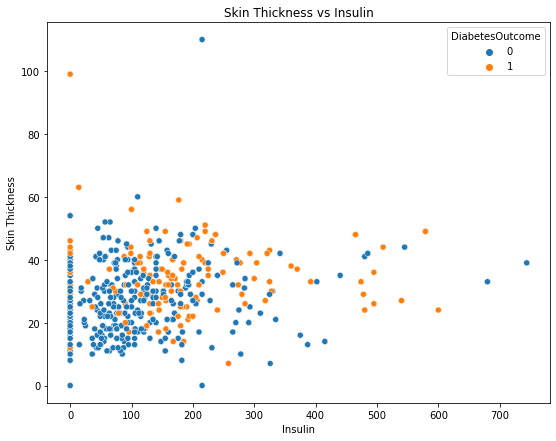

In [61]:
plt.figure(figsize=(9,7))
sns.scatterplot(df, y='SkinThickness', x='Insulin', hue='DiabetesOutcome').set(title='Skin Thickness vs Insulin', ylabel='Skin Thickness', xlabel='Insulin')
plt.show()

In [62]:
df_train = df.sample(round(len(df)*0.8))
df_test = df.drop(df_train.index)

In [63]:
formula = 'DiabetesOutcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age'

In [64]:
model = smf.glm(formula=formula, data=df_train, family=sm.families.Poisson())
result = model.fit()

In [65]:
result = result.predict(df_test)
result[result > 0.5] = 1
result[result <= 0.5] = 0

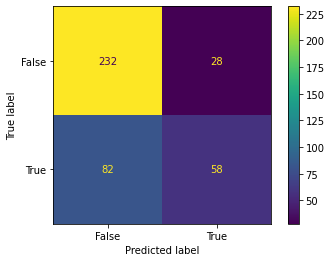

In [66]:
confusion_matrix = metrics.confusion_matrix(df_test.DiabetesOutcome, result)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [67]:
accuracy = metrics.accuracy_score(df_test.DiabetesOutcome, result)
print(accuracy)

0.725
